In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/freelancing/ehtisham work/Index prediction/'

In [4]:
df=pd.read_excel(path+"data.xlsx")

In [5]:
df.head()

,Unnamed: 0,D/M/Y,H:M:S,CO,CH4,H2S,SPO2
0,0,2020-05-05,10:25:01,5.37,10496.41,15.45,98.0
1,1,2020-05-05,11:25:02,5.13,9721.47,5.73,98.0
2,2,2020-05-05,10:25:26,4.89,8707.83,5.17,98.0
3,3,2020-05-05,10:25:26,4.71,8045.35,4.67,98.0
4,4,2020-05-05,10:25:26,4.35,7040.90,4.25,98.0


In [6]:
df.isnull().sum()

Unnamed: 0        0
D/M/Y             0
H:M:S             0
CO                0
CH4               0
H2S           50640
SPO2          25233
dtype: int64

In [7]:
df.shape

(53566, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53566 entries, 0 to 53565
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  53566 non-null  int64         
 1   D/M/Y       53566 non-null  datetime64[ns]
 2   H:M:S       53566 non-null  object        
 3   CO          53566 non-null  float64       
 4   CH4         53566 non-null  float64       
 5   H2S         2926 non-null   float64       
 6   SPO2        28333 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 2.9+ MB


In [9]:
df['D/M/Y'] = df['D/M/Y'].dt.strftime('%Y-%m-%d')

In [10]:
def check_type(data):
    if type(data) is str:
        return data
    else:
        return data.strftime("%H:%M:%S")

In [11]:
df['H:M:S'] = df['H:M:S'].apply(lambda x: check_type(x))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53566 entries, 0 to 53565
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53566 non-null  int64  
 1   D/M/Y       53566 non-null  object 
 2   H:M:S       53566 non-null  object 
 3   CO          53566 non-null  float64
 4   CH4         53566 non-null  float64
 5   H2S         2926 non-null   float64
 6   SPO2        28333 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ MB


In [13]:
df.head()

,Unnamed: 0,D/M/Y,H:M:S,CO,CH4,H2S,SPO2
0,0,2020-05-05,10:25:01,5.37,10496.41,15.45,98.0
1,1,2020-05-05,11:25:02,5.13,9721.47,5.73,98.0
2,2,2020-05-05,10:25:26,4.89,8707.83,5.17,98.0
3,3,2020-05-05,10:25:26,4.71,8045.35,4.67,98.0
4,4,2020-05-05,10:25:26,4.35,7040.90,4.25,98.0


In [14]:
t=df.iloc[1,2]

In [15]:
type(t)

str

In [16]:
df['DateTime']=df['D/M/Y']+' '+df["H:M:S"]

In [17]:
df.head()

,Unnamed: 0,D/M/Y,H:M:S,CO,CH4,H2S,SPO2,DateTime
0,0,2020-05-05,10:25:01,5.37,10496.41,15.45,98.0,2020-05-05 10:25:01
1,1,2020-05-05,11:25:02,5.13,9721.47,5.73,98.0,2020-05-05 11:25:02
2,2,2020-05-05,10:25:26,4.89,8707.83,5.17,98.0,2020-05-05 10:25:26
3,3,2020-05-05,10:25:26,4.71,8045.35,4.67,98.0,2020-05-05 10:25:26
4,4,2020-05-05,10:25:26,4.35,7040.90,4.25,98.0,2020-05-05 10:25:26


In [18]:
df.columns

Index(['Unnamed: 0', 'D/M/Y', 'H:M:S', 'CO', 'CH4', 'H2S', 'SPO2', 'DateTime'], dtype='object')

In [19]:
df.drop(['Unnamed: 0', 'D/M/Y', 'H:M:S','CO', 'H2S', 'CH4'],inplace=True,axis=1)

In [20]:
df

,SPO2,DateTime
0,98.0,2020-05-05 10:25:01
1,98.0,2020-05-05 11:25:02
2,98.0,2020-05-05 10:25:26
3,98.0,2020-05-05 10:25:26
4,98.0,2020-05-05 10:25:26
...,...,...
53561,98.0,2020-05-05 18:9:58
53562,98.0,2020-05-05 18:9:59
53563,98.0,2020-05-05 18:09:06
53564,97.0,2020-05-05 18:09:07


In [21]:
df.isnull().sum()

SPO2        25233
DateTime        0
dtype: int64

In [22]:
df['DateTime'] = pd.to_datetime(df['DateTime'],errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53566 entries, 0 to 53565
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SPO2      28333 non-null  float64       
 1   DateTime  53563 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 837.1 KB


In [24]:
df.head()

,SPO2,DateTime
0,98.0,2020-05-05 10:25:01
1,98.0,2020-05-05 11:25:02
2,98.0,2020-05-05 10:25:26
3,98.0,2020-05-05 10:25:26
4,98.0,2020-05-05 10:25:26


In [25]:
df.isnull().sum()

SPO2        25233
DateTime        3
dtype: int64

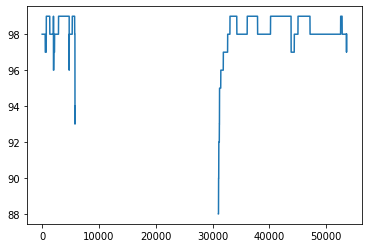

In [26]:
plt.plot(df.SPO2)

(array([7.0000e+00, 4.0000e+01, 0.0000e+00, 9.9000e+01, 4.4000e+01,
        1.2000e+01, 2.2400e+02, 4.9200e+02, 1.6390e+03, 2.5776e+04]),
 array([88. , 89.1, 90.2, 91.3, 92.4, 93.5, 94.6, 95.7, 96.8, 97.9, 99. ]),
 <a list of 10 Patch objects>)

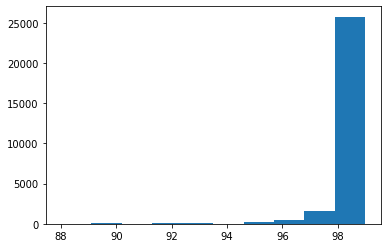

In [27]:
plt.hist(df.SPO2)

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

SPO2        0
DateTime    0
dtype: int64

In [30]:
df.shape

(28330, 2)

In [33]:
min(df['SPO2'])

88.0

In [34]:
max(df['SPO2'])

99.0

In [35]:
np.std(df['SPO2'])

0.915784425534899

In [36]:
np.average(df['SPO2'])

98.26166607836215

In [37]:
df1=df

In [38]:
df=df1

In [39]:
df.head()

,SPO2,DateTime
0,98.0,2020-05-05 10:25:01
1,98.0,2020-05-05 11:25:02
2,98.0,2020-05-05 10:25:26
3,98.0,2020-05-05 10:25:26
4,98.0,2020-05-05 10:25:26


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28330 entries, 0 to 53565
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SPO2      28330 non-null  float64       
 1   DateTime  28330 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 664.0 KB


In [41]:
# df['CH4'][df['CH4']>5000]=5000

In [42]:

df.head()

,SPO2,DateTime
0,98.0,2020-05-05 10:25:01
1,98.0,2020-05-05 11:25:02
2,98.0,2020-05-05 10:25:26
3,98.0,2020-05-05 10:25:26
4,98.0,2020-05-05 10:25:26


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28330 entries, 0 to 53565
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SPO2      28330 non-null  float64       
 1   DateTime  28330 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 664.0 KB


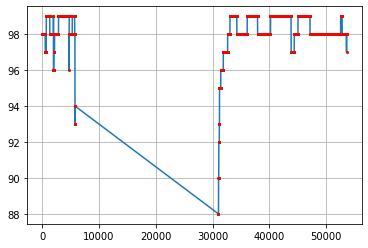

In [45]:

plt.grid()
plt.plot(df.SPO2,marker="o", markersize=2, markeredgecolor="red",
markerfacecolor="green")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


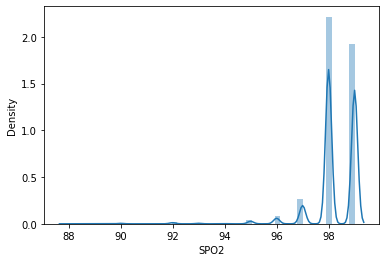

In [46]:
sns.distplot(df.SPO2)

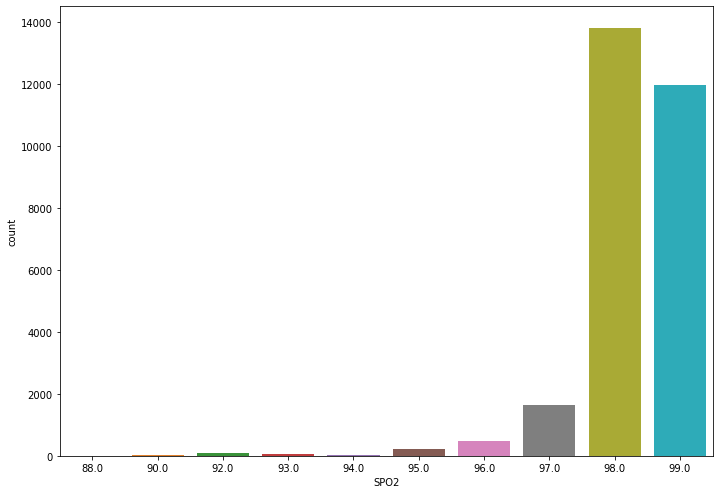

In [47]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax, data=df, x='SPO2')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


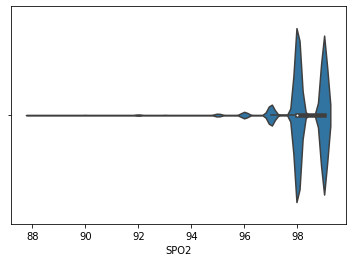

In [48]:
sns.violinplot(df.SPO2)

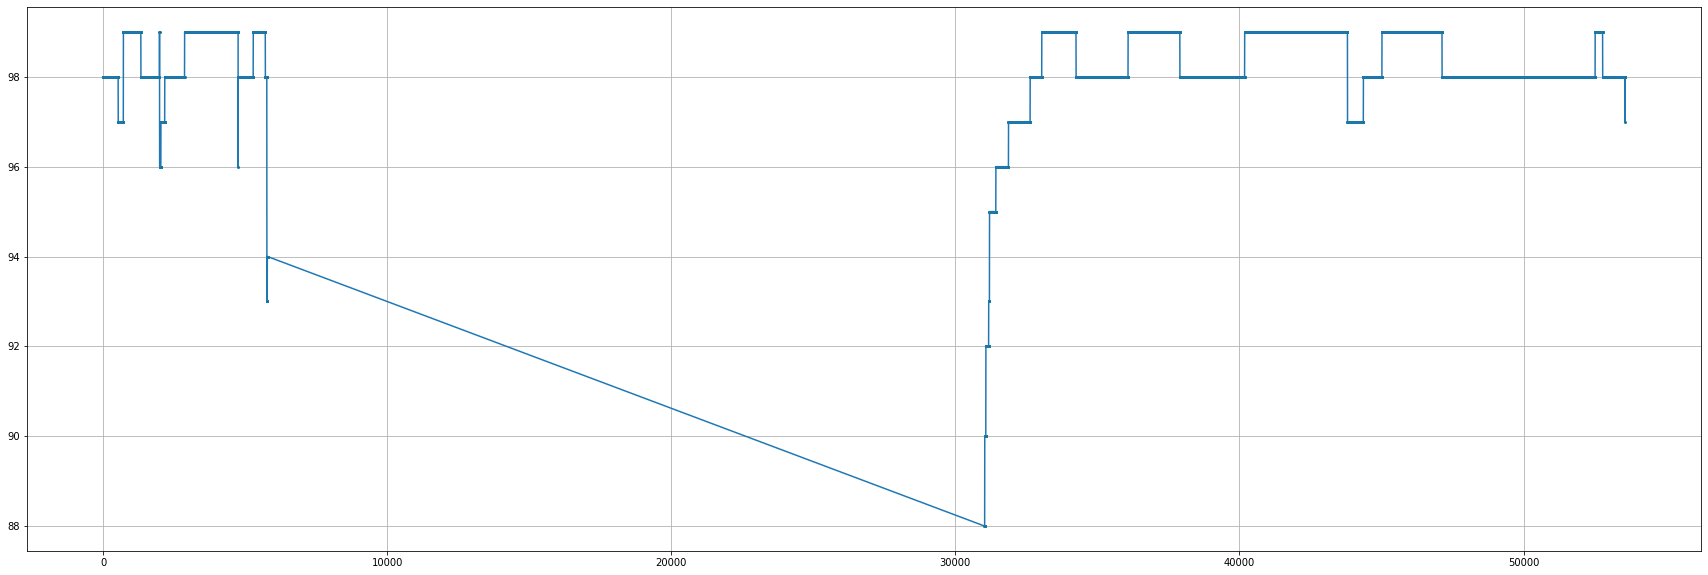

In [49]:
plt.figure(figsize=(30,10))
plt.grid()
plt.plot(df.SPO2,marker="o", markersize=2,
markerfacecolor="green")
plt.show()

In [50]:
df.head()

,SPO2,DateTime
0,98.0,2020-05-05 10:25:01
1,98.0,2020-05-05 11:25:02
2,98.0,2020-05-05 10:25:26
3,98.0,2020-05-05 10:25:26
4,98.0,2020-05-05 10:25:26


In [51]:
df.tail()

,SPO2,DateTime
53561,98.0,2020-05-05 18:09:58
53562,98.0,2020-05-05 18:09:59
53563,98.0,2020-05-05 18:09:06
53564,97.0,2020-05-05 18:09:07
53565,98.0,2020-05-05 18:09:09


In [52]:
df.DateTime.values

array(['2020-05-05T10:25:01.000000000', '2020-05-05T11:25:02.000000000',
       '2020-05-05T10:25:26.000000000', ...,
       '2020-05-05T18:09:06.000000000', '2020-05-05T18:09:07.000000000',
       '2020-05-05T18:09:09.000000000'], dtype='datetime64[ns]')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28330 entries, 0 to 53565
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SPO2      28330 non-null  float64       
 1   DateTime  28330 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 MB


In [54]:
df = df.sort_values('DateTime')

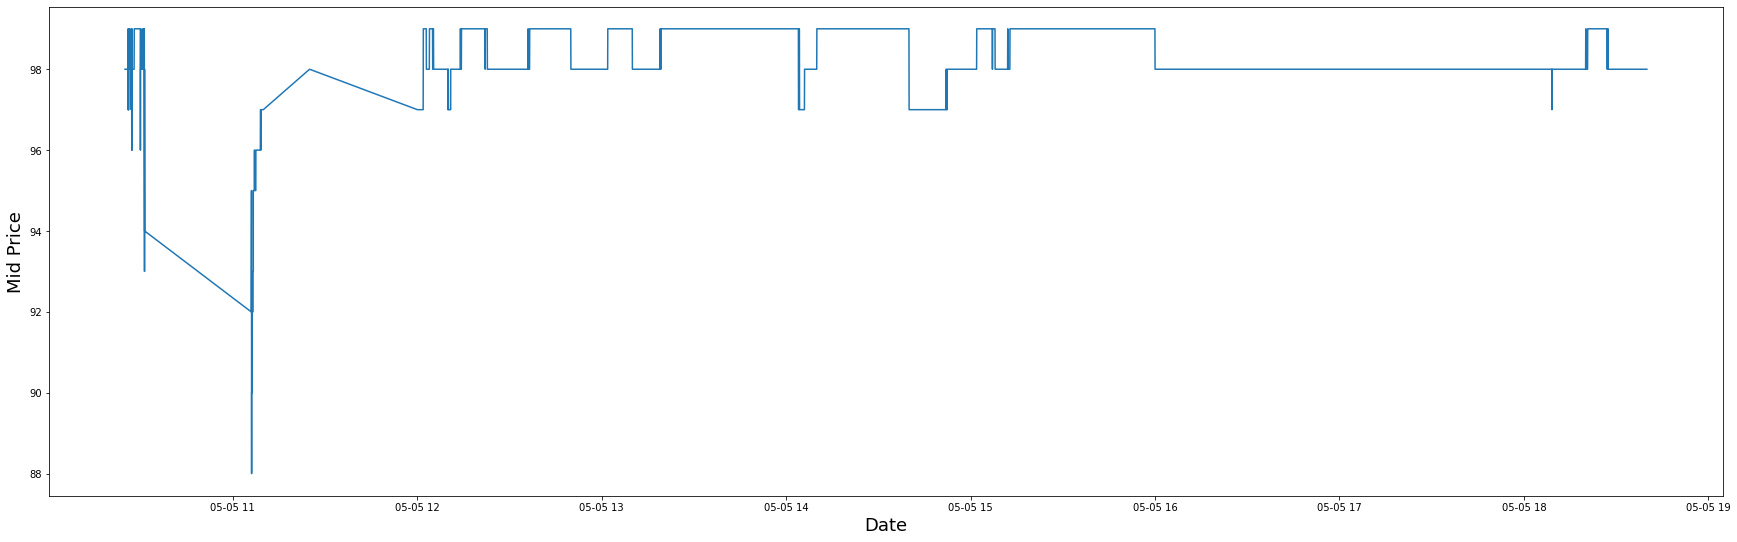

In [55]:
plt.figure(figsize = (30,9))
plt.plot(df["DateTime"],df['SPO2'])
# plt.xticks(range(0,df.shape[0],5),df['DateTime'].loc[::5],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [ ]:
df.head()

,CH4,DateTime
0,5000.00,2020-05-05 10:25:01
24,2453.22,2020-05-05 10:25:26
25,2382.70,2020-05-05 10:25:26
26,2337.38,2020-05-05 10:25:26
27,2277.23,2020-05-05 10:25:26


In [56]:
scale=MinMaxScaler(feature_range = (0, 1))
df[['SPO2']]=scale.fit_transform(df[['SPO2']])

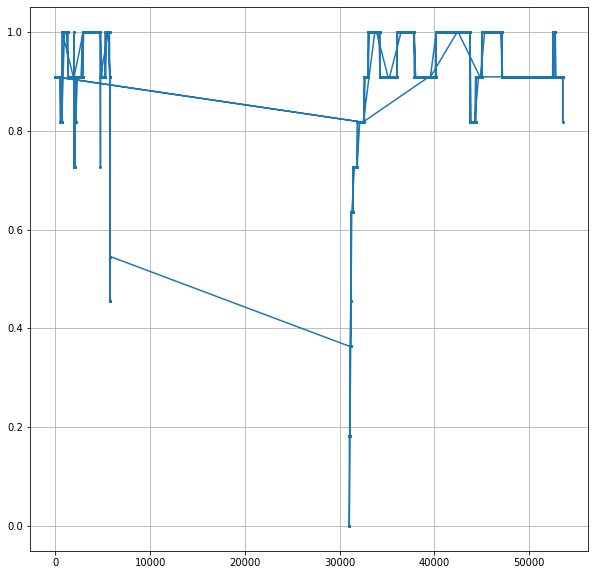

In [57]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(df.SPO2,marker="o", markersize=2,
markerfacecolor="green")
plt.show()

In [58]:
train_size = int(len(df) * 0.85)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

24080 4250


In [ ]:
df.head()

,CH4,DateTime
0,1.000000,2020-05-05 10:25:01
24,0.490644,2020-05-05 10:25:26
25,0.476540,2020-05-05 10:25:26
26,0.467476,2020-05-05 10:25:26
27,0.455446,2020-05-05 10:25:26


In [59]:
from sklearn.preprocessing import RobustScaler

f_columns = ['DateTime']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['SPO2']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['SPO2'] = cnt_transformer.transform(train[['SPO2']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['SPO2'] = cnt_transformer.transform(test[['SPO2']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [60]:

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [61]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.SPO2, time_steps)
X_test, y_test = create_dataset(test, test.SPO2, time_steps)

print(X_train.shape, y_train.shape)

(24070, 10, 2) (24070,)


In [62]:
tf.__version__

'2.8.0'

# LSTM 

In [63]:
#initialisizng the model 
model= keras.Sequential()

#First Input layer and LSTM layer with 0.2% dropout
model.add(keras.layers.LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
model.add(keras.layers.LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
model.add(keras.layers.Dropout(0.2))

#Third LSTM layer with 0.2% dropout
model.add(keras.layers.LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
model.add(keras.layers.Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
model.add(keras.layers.LSTM(units=50,kernel_initializer='glorot_uniform'))
model.add(keras.layers.Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [64]:
history = model.fit(
    X_train, y_train, 
    epochs=200, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/200
677/677 [==============================] - 17s 11ms/step - loss: 0.3225 - val_loss: 0.2700
Epoch 2/200
677/677 [==============================] - 6s 9ms/step - loss: 0.5357 - val_loss: 0.0409
Epoch 3/200
677/677 [==============================] - 9s 13ms/step - loss: 0.5248 - val_loss: 0.0148
Epoch 4/200
677/677 [==============================] - 9s 13ms/step - loss: 0.3353 - val_loss: 0.0033
Epoch 5/200
677/677 [==============================] - 6s 9ms/step - loss: 0.2979 - val_loss: 0.0122
Epoch 6/200
677/677 [==============================] - 6s 9ms/step - loss: 0.2667 - val_loss: 0.0021
Epoch 7/200
677/677 [==============================] - 6s 9ms/step - loss: 0.2538 - val_loss: 0.0036
Epoch 8/200
677/677 [==============================] - 6s 9ms/step - loss: 0.3006 - val_loss: 0.0499
Epoch 9/200
677/677 [==============================] - 6s 9ms/step - loss: 0.2814 - val_loss: 0.0040
Epoch 10/200
677/677 [==============================] - 6s 9ms/step - loss: 0.2196 - va

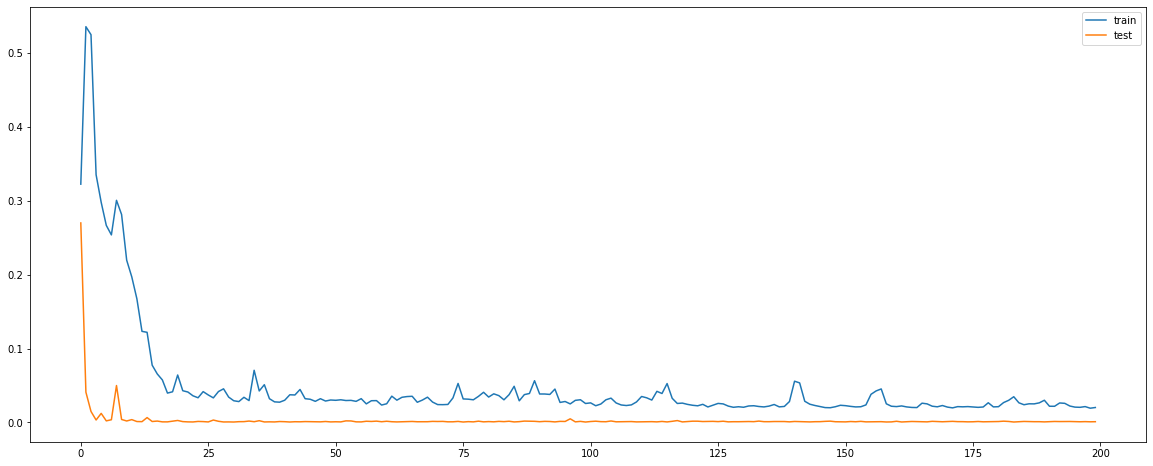

In [65]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

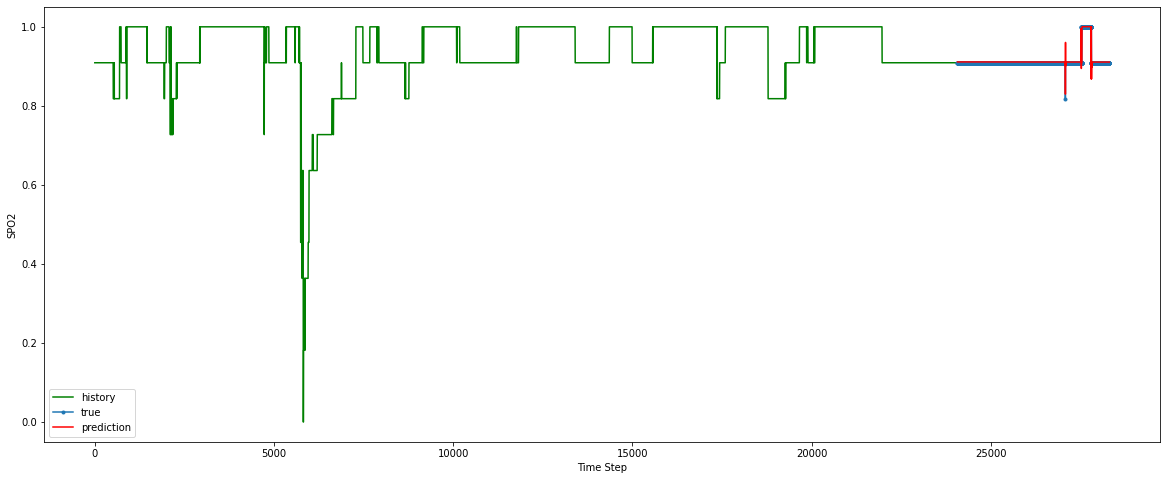

In [66]:
y_pred = model.predict(X_test)
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)
plt.figure(figsize=(20,8))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('SPO2')
plt.xlabel('Time Step')
plt.legend()
plt.show();

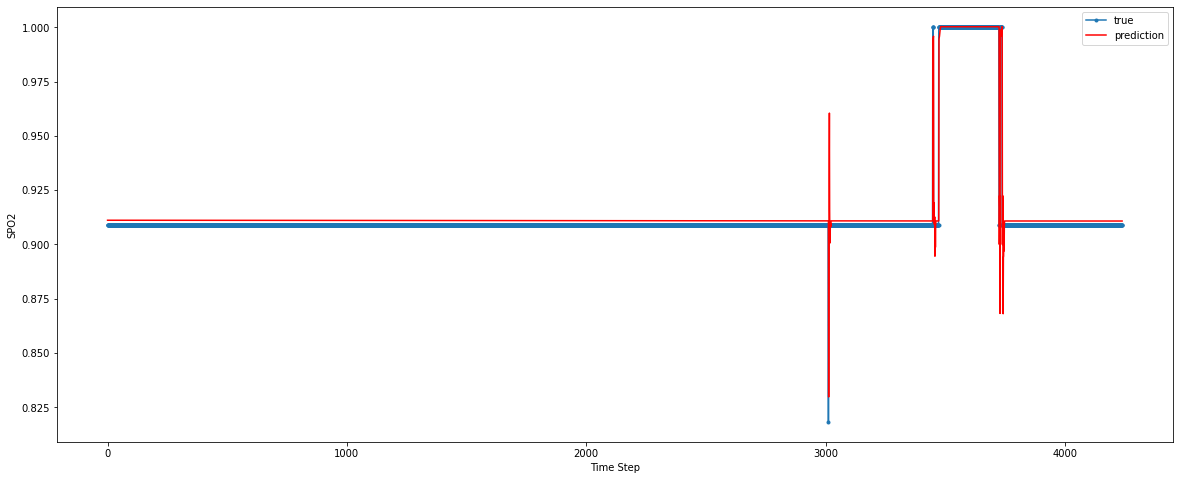

In [67]:
plt.figure(figsize=(20,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('SPO2')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [68]:
model.save(path+'models/SPO2/SPO2_lstm.h5')

In [69]:
import pickle
output = open(path+'encoders/SPO2_encoder.pkl', 'wb')
pickle.dump(scale, output)
output.close()

# ARIME Model

In [70]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy.ndimage.interpolation import shift
from sklearn.metrics import mean_squared_error
from math import sqrt



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [72]:
df.head()

,SPO2,DateTime
0,0.909091,2020-05-05 10:25:01
24,0.909091,2020-05-05 10:25:26
25,0.909091,2020-05-05 10:25:26
26,0.909091,2020-05-05 10:25:26
27,0.909091,2020-05-05 10:25:26


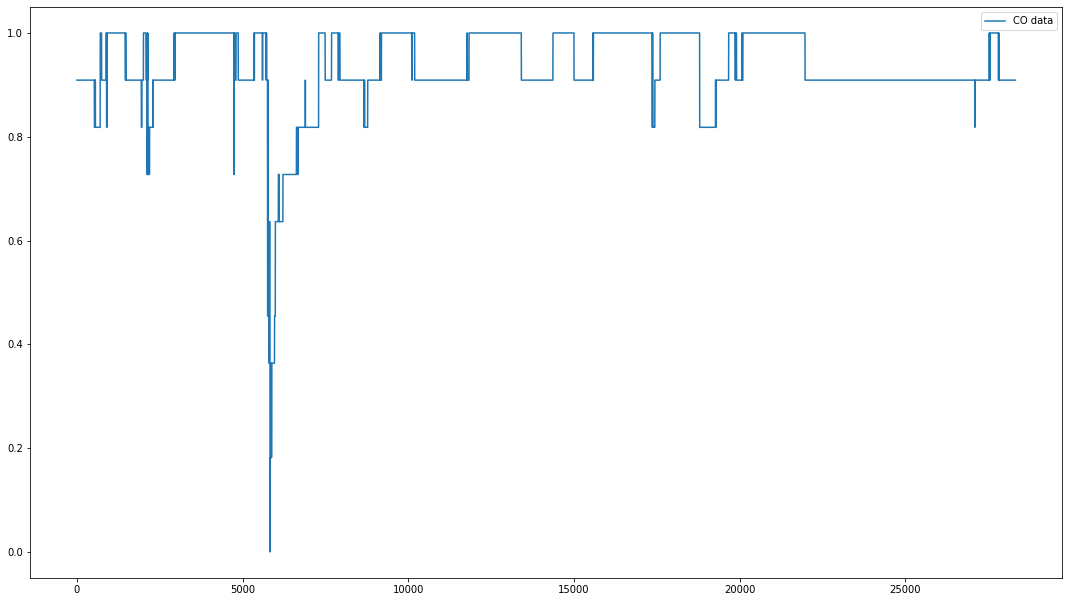

In [73]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(df['SPO2'].values, label = "CO data")
plt.legend()

In [74]:
def isSeriesStationary(series):
    pValue = adfuller(series)[1]
    if pValue > 0.05:
        return False
    else:
        return True

In [75]:
def isSeriesStationaryAvg(series, delta = 2):
    split = int(len(series)/2)
    split1, split2 = series[:split], series[split:]
    avg1, avg2 = split1.mean(), split2.mean()
    var1, var2 = split1.var(), split2.var()
    if abs(avg1 - avg2) > delta or abs(var1 - var2) > delta**2:
        return False
    else:
        return True

In [76]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

def describeSeries(data, label):
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.plot(data, label = "Series")
    plt.plot(data.rolling(window = 2).mean(), '--', label = "Rolling mean")
    plt.plot(data.rolling(2).std(), ":", label = "Rolling Std")
    plt.legend()
    plt.show()
    plt.savefig(label)
    plt.clf()

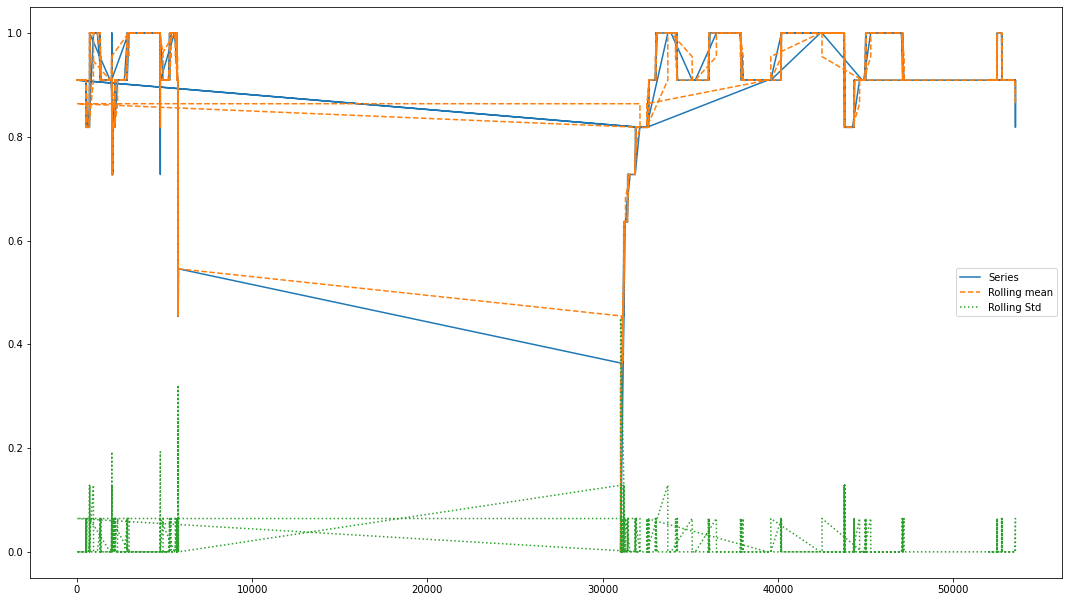

<Figure size 432x288 with 0 Axes>

In [77]:
describeSeries(df['SPO2'], "DescribeCO.png")

In [78]:
def splitTrainTest(series, testSplit):
    totalData = len(series)
    trainSplit = int(totalData * (1 - testSplit))
    trainSet = series[:trainSplit]
    testSet = series[trainSplit:]
    return trainSet, testSet

In [79]:

isSeriesStationaryAvg(df["SPO2"].values)

True

In [80]:
isSeriesStationary(df["SPO2"].values)

True

In [81]:
trainSet, testSet = splitTrainTest(df["SPO2"].values, 0.1)

In [82]:
import statsmodels.api as sm

In [83]:
differencedTrainSet = difference(trainSet, 365)
model = sm.tsa.ARIMA(differencedTrainSet, order=(7,0,1))
"""Fit model with non constant trend and no displacement"""
model_fit = model.fit()
forecast = model_fit.predict(len(differencedTrainSet), len(differencedTrainSet) + len(testSet))

In [84]:
yPrediction = []
history = list(trainSet)
for f in forecast:
    yPredict = inverse_difference(history, f, 365)
    yPrediction.append(yPredict)
    history.append(yPredict)

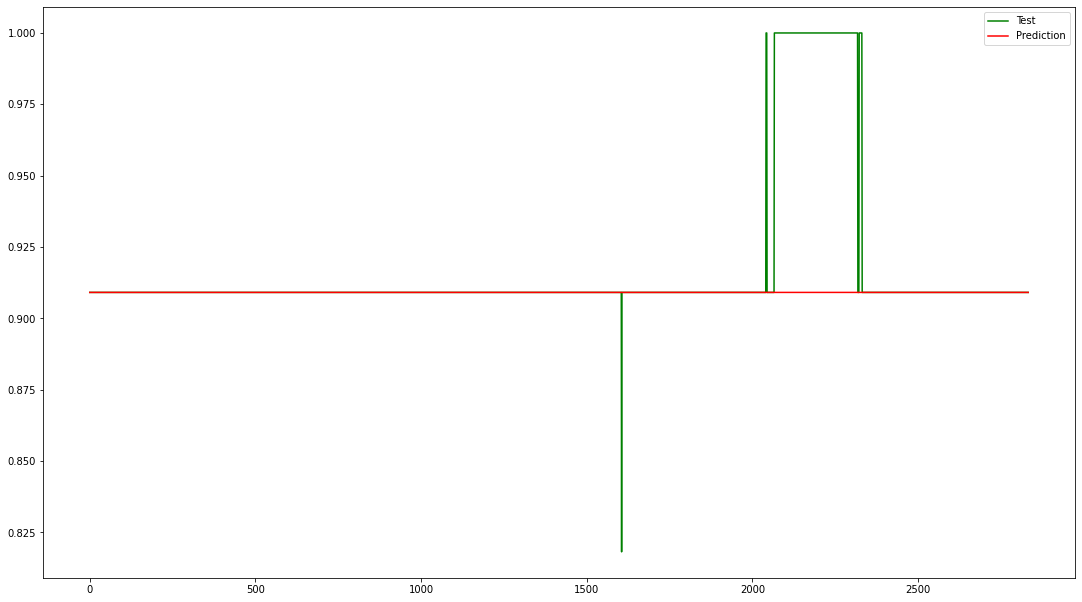

In [85]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(testSet, color='green', label = "Test")
plt.plot(yPrediction[:-1], color='red', label = "Prediction")
plt.legend()
plt.savefig("TemperaturePrediction.png")

In [ ]:
print(sqrt(mean_squared_error(testSet, yPrediction[:-1])))

0.3993474301468267


# Random forest

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame
import numpy as np
from datetime import datetime
import calendar
from datetime import timedelta
import datetime as dt


In [ ]:
df.head()

,CH4,DateTime
0,1.000000,2020-05-05 10:25:01
24,0.490644,2020-05-05 10:25:26
25,0.476540,2020-05-05 10:25:26
26,0.467476,2020-05-05 10:25:26
27,0.455446,2020-05-05 10:25:26


In [ ]:
df1=df

In [ ]:
df1.head()

,CH4,DateTime
0,1.000000,2020-05-05 10:25:01
24,0.490644,2020-05-05 10:25:26
25,0.476540,2020-05-05 10:25:26
26,0.467476,2020-05-05 10:25:26
27,0.455446,2020-05-05 10:25:26


In [ ]:
df1['year'] = pd.DatetimeIndex(df1['DateTime']).year
df1['month'] = pd.DatetimeIndex(df1['DateTime']).month
df1['day'] = pd.DatetimeIndex(df1['DateTime']).day
df1['hour'] = pd.DatetimeIndex(df1['DateTime']).hour
df1['minute'] = pd.DatetimeIndex(df1['DateTime']).minute
df1['second'] = pd.DatetimeIndex(df1['DateTime']).second

In [ ]:
df1.head()

,CH4,DateTime,year,month,day,hour,minute,second
0,1.000000,2020-05-05 10:25:01,2020,5,5,10,25,1
24,0.490644,2020-05-05 10:25:26,2020,5,5,10,25,26
25,0.476540,2020-05-05 10:25:26,2020,5,5,10,25,26
26,0.467476,2020-05-05 10:25:26,2020,5,5,10,25,26
27,0.455446,2020-05-05 10:25:26,2020,5,5,10,25,26


In [ ]:
df.head()

,CH4,DateTime,year,month,day,hour,minute,second
0,1.000000,2020-05-05 10:25:01,2020,5,5,10,25,1
24,0.490644,2020-05-05 10:25:26,2020,5,5,10,25,26
25,0.476540,2020-05-05 10:25:26,2020,5,5,10,25,26
26,0.467476,2020-05-05 10:25:26,2020,5,5,10,25,26
27,0.455446,2020-05-05 10:25:26,2020,5,5,10,25,26


In [ ]:
df1=df.copy()

In [ ]:
df1.drop(['DateTime'],inplace=True,axis=1)

In [ ]:
df1.head()

,CH4,year,month,day,hour,minute,second
0,1.000000,2020,5,5,10,25,1
24,0.490644,2020,5,5,10,25,26
25,0.476540,2020,5,5,10,25,26
26,0.467476,2020,5,5,10,25,26
27,0.455446,2020,5,5,10,25,26


In [ ]:
Y=df1['CH4']
X=df1

In [ ]:
print(X.shape)

(53563, 7)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,shuffle=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=1000)
model.fit(x_train, y_train)
yhat = model.predict(x_test)

In [ ]:
y_test

42365    0.156836
42366    0.151694
42367    0.154008
42368    0.146642
42369    0.151694
           ...   
53319    0.125460
53320    0.122686
53321    0.122686
53322    0.122686
53323    0.124534
Name: CH4, Length: 13391, dtype: float64

In [ ]:
yhat

array([0.156836  , 0.151694  , 0.154008  , ..., 0.122686  , 0.122686  ,
       0.12453402])

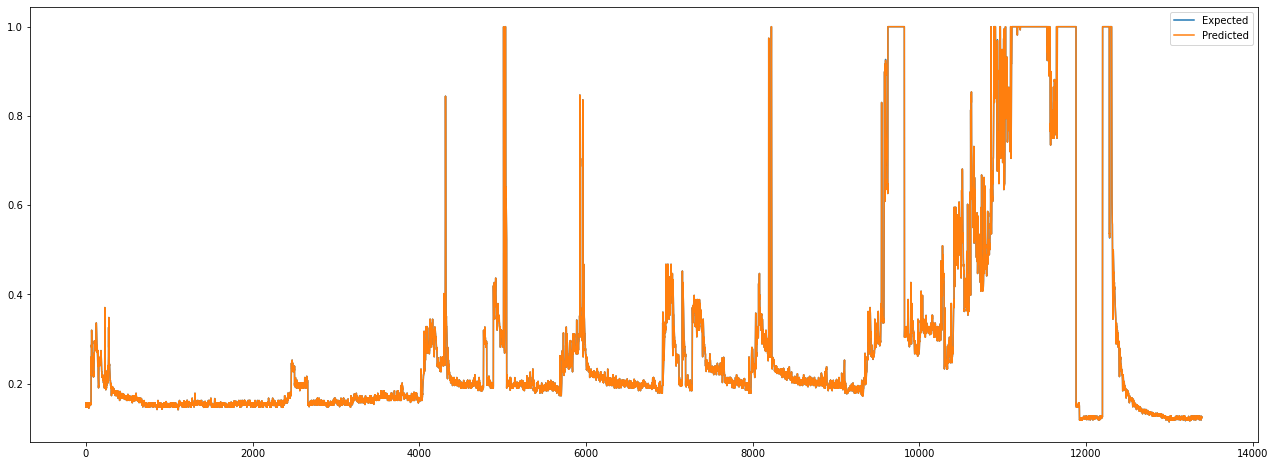

In [ ]:
plt.figure(figsize=(22,8))
plt.plot(y_test.values, label='Expected')
plt.plot(yhat, label='Predicted')
plt.legend()
plt.show()